In [1]:
import requests
from bs4 import BeautifulSoup 
import pandas as pd
import numpy as py
import matplotlib.pyplot as plot
import seaborn as sns
from matplotlib import rc

import matplotlib.mlab as mlab

In [2]:
dfMain = pd.read_csv('main.csv', low_memory=False);
dfMem = pd.read_csv('hpq_mem.csv', low_memory=False);

#Loads 'main.csv' and 'hpq_mem.csv'

In [3]:
dfMain = dfMain.filter(['mainid','brgy']);
dfMem = dfMem.filter(['mainid','educal']);

#Filters the two dataframes to show only the relevant columns

In [4]:
dfMainMem = pd.merge(dfMain, dfMem, left_on='mainid', right_on='mainid', how='left');

# Joins dfMain with dfMem using matching mainids
dfMainMem

,mainid,brgy,educal
0,1061066,186,NaN
1,1061066,186,300.0
2,1061066,186,32.0
3,555683,69,300.0
4,555683,69,300.0
5,8611889,1,34.0
6,299398,165,31.0
7,299398,165,16.0
8,136921,135,19.0
9,3842267,43,100.0


In [5]:
dfMainMem = dfMainMem.loc[dfMainMem.educal < 38.0]
# Removes family members who have responded with 38 and above as their educational attainment as these are invalid responses.
# This automatically removes NaN values in educal column as well

dfMainMem


,mainid,brgy,educal
2,1061066,186,32.0
5,8611889,1,34.0
6,299398,165,31.0
7,299398,165,16.0
8,136921,135,19.0
11,899855,201,32.0
15,235953,190,0.0
20,1591438,47,31.0
21,1591438,47,0.0
24,1053432,130,15.0


In [6]:
dfMainMem['family_size'] = dfMainMem.mainid.map(dfMainMem.mainid.value_counts())
# Determines the family size based on the number of VALID educal responses.
# Educal is the highest educational attainment of each family member.
# We were forced to assume that family size equals VALID educal responses count because there is no data about family size.

dfMainMem

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,mainid,brgy,educal,family_size
2,1061066,186,32.0,1
5,8611889,1,34.0,1
6,299398,165,31.0,2
7,299398,165,16.0,2
8,136921,135,19.0,1
11,899855,201,32.0,1
15,235953,190,0.0,1
20,1591438,47,31.0,2
21,1591438,47,0.0,2
24,1053432,130,15.0,5


In [11]:
dfMainMem = dfMainMem.loc[dfMainMem.educal > 31]
# Removes responses with less than 32 (first year college) as educational attainment

dfMainMem['above_PS'] = dfMainMem.mainid.map(dfMainMem.mainid.value_counts())
# Determines the number of current college takers and college grads based on the number of educal responses in the filtered data.
# Educal is the highest educational attainment of each family members.

dfMainMem


,mainid,brgy,educal,family_size,above_PS
2,1061066,186,32.0,1,1
5,8611889,1,34.0,1,1
11,899855,201,32.0,1,1
27,1053432,130,32.0,5,1
29,1112848,171,32.0,2,1
32,98326,72,33.0,2,1
37,1955060,40,32.0,4,1
43,7317935,179,34.0,1,1
48,129550,169,33.0,1,1
62,194394,170,33.0,2,2


In [15]:
dfMainMem = dfMainMem.drop(columns=['educal'])
# Drops the educal column which we dont have use for anymore

dfMainMem.drop_duplicates()
# Drop duplicate entries borne out of having many responses with 32 or more as educational attainment.

dfMainMem['score'] = dfMainMem['above_PS'] / dfMainMem['family_size']
# Creates a new column score which keeps the score of each family's literacy rate 
# by taking the ratio of college takers and grads over the total family size based on VALID educal responses.

dfMainMem

,mainid,brgy,family_size,above_PS,score
2,1061066,186,1,1,1.000000
5,8611889,1,1,1,1.000000
11,899855,201,1,1,1.000000
27,1053432,130,5,1,0.200000
29,1112848,171,2,1,0.500000
32,98326,72,2,1,0.500000
37,1955060,40,4,1,0.250000
43,7317935,179,1,1,1.000000
48,129550,169,1,1,1.000000
62,194394,170,2,2,1.000000


In [51]:
arrayBrgyScores = dfMainMem.groupby('brgy')['score'].mean()
# Groups the families by brgy and takes the average of their family literacy.
# Output is an array, not a dataframe.

arrayBrgyScores


brgy
1      0.833333
2      0.695349
3      0.444444
4      0.566935
5      0.745679
6      0.688889
7      0.714583
8      0.633838
9      0.887427
10     0.773246
11     0.677211
12     0.678205
13     0.621443
14     0.674324
15     0.941176
16     0.704427
18     0.856592
19     0.721556
20     0.848627
21     0.736742
22     0.635714
23     0.706878
24     0.718484
25     0.657233
26     0.684694
27     0.715603
28     0.700273
30     0.732051
31     0.533333
33     0.820076
         ...   
171    0.704086
172    0.583888
173    0.736155
174    0.663480
175    0.643870
177    0.579175
178    0.651429
179    0.652755
180    0.592760
181    0.551156
182    0.644343
183    0.763382
184    0.628116
185    0.653148
186    0.617390
187    0.720202
188    0.713434
189    0.664470
190    0.614237
191    0.680748
192    0.703653
193    0.688633
194    0.707143
195    0.646166
196    0.652356
197    0.679508
198    0.713043
199    0.689191
200    0.641949
201    0.568610
Name: score, Length

In [52]:
dfBrgy1 = dfMainMem.loc[dfMainMem.brgy == 1]
dfBrgy1

# Just to check if output is correct, Brgy 1 has 3 respondents with a total of 2.5 score, therefore averaging on 0.83333

,mainid,brgy,family_size,above_PS,score
5,8611889,1,1,1,1.0
76035,120577,1,1,1,1.0
79832,254233,1,2,1,0.5


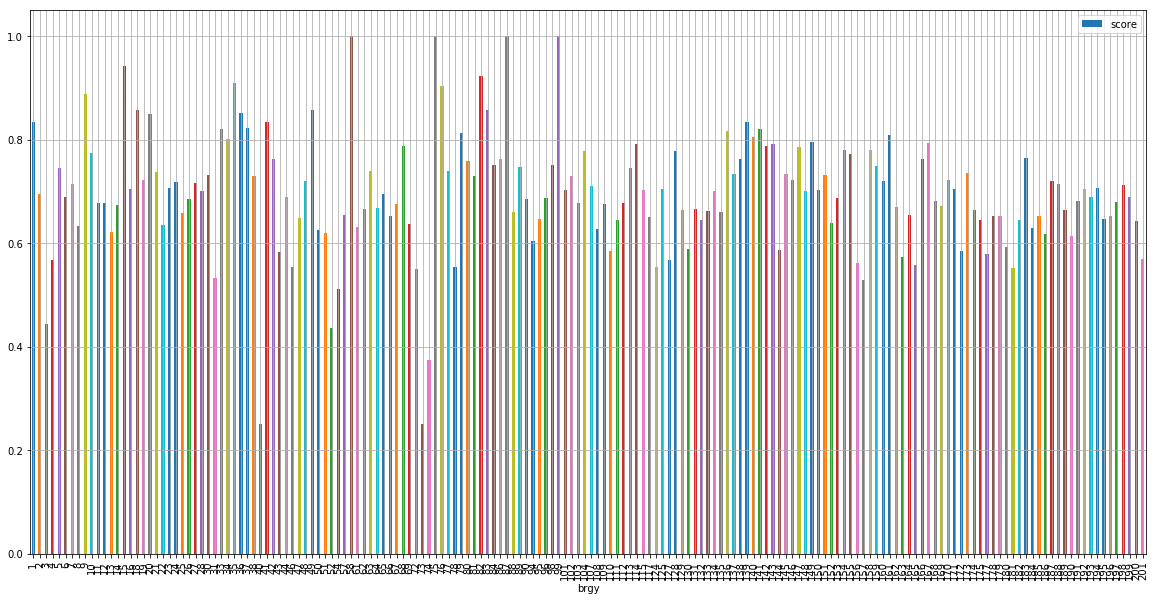

In [53]:
arrayBrgyScores.plot(figsize=(20, 10), kind='bar', grid=True, align='center', width=0.5, stacked=True)
plot.legend()
plot.show()

# Bar graph of the ARRAY of means of each brgy

In [49]:
dfScore1 = pd.DataFrame(dfBrgyMeanScore);
dfScore1.to_csv('BrgyScore1.csv', encoding='utf-8')

# The computed means for each baranggay's family college literacy rate is saved onto a CSV file for future use.